# Import Package & Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from marketing_attribution_models import MAM

%matplotlib inline

In [ ]:
# read dataset
# marketing funnel
olist_marketing_qualified_leads = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_marketing_qualified_leads_dataset.csv")
olist_closed_deals = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_closed_deals_dataset.csv")

# marketing order|
olist_order_items = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv")
olist_seller = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv")

# Combining Dataset

## Order Items & Seller

In [ ]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
olist_seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# unique check on seller_id variabel
olist_order_items['seller_id'].nunique()

3095

In [ ]:
# create specific dataframe by grouping of seller id
data_seller_agg = olist_order_items.groupby('seller_id', as_index=False).agg({
    'order_id': 'nunique',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
})

In [ ]:
# renaming daa_seller_agg dataframe
data_seller_agg = data_seller_agg.rename(columns={
    'order_id': "total_trx",
    'product_id': "total_ordered"
})

In [ ]:
# check data_seller_agg
data_seller_agg.head(10)

,seller_id,total_trx,total_ordered,price,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,1,2685.00,63.06
1,001cca7ae9ae17fb1caed9dfb1094831,200,11,25080.03,8854.14
2,001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94
3,002100f778ceb8431b7a1020ff7ab48f,51,24,1234.50,793.66
4,003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38
5,004c9cd9d87a3c30c522c48c4fc07416,158,88,19712.71,3551.23
6,00720abe85ba0859807595bbf045a33b,13,9,1007.50,315.98
7,00ab3eff1b5192e5f1a63bcecfee11c8,1,1,98.00,12.08
8,00d8b143d12632bad99c0ad66ad52825,1,1,86.00,51.10
9,00ee68308b45bc5e2660cd833c3f81cc,135,23,20260.00,3180.66


In [ ]:
# combining the order items and order dataset by joining on order id
cols= [
    'seller_id',
    'seller_city',
    'seller_state',
    'total_trx',
    'total_ordered',
    'price',
    'freight_value'
]

data_seller = pd.merge(
    left= data_seller_agg,
    right= olist_seller,
    on= 'seller_id',
    how= 'inner'
)[cols]

data_seller.head(5)

,seller_id,seller_city,seller_state,total_trx,total_ordered,price,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,3,1,2685.00,63.06
1,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,200,11,25080.03,8854.14
2,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,1,1,250.00,17.94
3,002100f778ceb8431b7a1020ff7ab48f,franca,SP,51,24,1234.50,793.66
4,003554e2dce176b5555353e4f3555ac8,goiania,GO,1,1,120.00,19.38


In [ ]:
# check data shape
data_seller.shape

(3095, 7)

## Marketing Channel Dataset

In [ ]:
olist_marketing_qualified_leads

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [ ]:
olist_closed_deals

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [ ]:
# check mql_id nunique
olist_marketing_qualified_leads['mql_id'].nunique()

8000

In [ ]:
# based on nunique mql we only combine those data by mql_id that th order already closed
cols= [
    'mql_id',
    'seller_id',
    'business_segment',
    'lead_type',
    'business_type',
    'first_contact_date',
    'landing_page_id',
    'declared_monthly_revenue',
    'origin'
]

data_marketing = pd.merge(
    left= olist_closed_deals,
    right= olist_marketing_qualified_leads,
    on= 'mql_id',
    how= 'left'
)[cols]

data_marketing.head(5)

,mql_id,seller_id,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown


In [ ]:
# check data shape
data_marketing.shape

(842, 9)

In [ ]:
# nunique of seller_id and mql_id
print(data_marketing['mql_id'].nunique(),'\n')
print(data_marketing['seller_id'].nunique())

842 

842


## Combining

In [ ]:
cols= [
    'mql_id',
    'seller_id',
    'seller_city',
    'seller_state',
    'business_segment',
    'lead_type',
    'business_type',
    'first_contact_date',
    'landing_page_id',
    'declared_monthly_revenue',
    'origin',
    'total_trx',
    'total_ordered',
    'price',
    'freight_value'
]

data = pd.merge(
    left= data_marketing,
    right= data_seller,
    on= 'seller_id',
    how= 'left'
)[cols]

data

,mql_id,seller_id,seller_city,seller_state,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin,total_trx,total_ordered,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,belo horizonte,MG,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search,3.0,3.0,858.00,72.17
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,NaN,NaN,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral,NaN,NaN,NaN,NaN
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,novo hamburgo,RS,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search,107.0,48.0,23065.02,2307.06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,NaN,NaN,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search,NaN,NaN,NaN,NaN
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,santos,SP,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown,15.0,10.0,573.50,242.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,NaN,NaN,home_decor,offline,reseller,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,0.0,organic_search,NaN,NaN,NaN,NaN
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,NaN,NaN,construction_tools_house_garden,online_big,reseller,2018-05-18,b76ef37428e6799c421989521c0e5077,200000.0,organic_search,NaN,NaN,NaN,NaN
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,NaN,NaN,computers,online_medium,reseller,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,0.0,paid_search,NaN,NaN,NaN,NaN
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,NaN,NaN,pet,online_beginner,reseller,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,0.0,social,NaN,NaN,NaN,NaN


# Data Description

In [ ]:
# data understanding and profilling
print("="*10,"Data Understanding & Profilling","="*10)
print("\n")

# data shape
print("There is", data.shape[0], "observation and", data.shape[1], "columns on dataset")
print("\n")

# Data Information 
print("Data Info:", data.info())
print("\n")

# Numerical and Categorical Column
num= data.select_dtypes('number').columns
cat = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[num].columns}')
print('\n')
print(f'Categorical Columns: {data[cat].columns}')
print('\n')

# Statistical Summary of The Data
print("Statistical Description of Data:", data.describe())
print('\n','\n')

========== Data Understanding & Profilling ==========


There is 842 observation and 15 columns on dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 841
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mql_id                    842 non-null    object 
 1   seller_id                 842 non-null    object 
 2   seller_city               380 non-null    object 
 3   seller_state              380 non-null    object 
 4   business_segment          841 non-null    object 
 5   lead_type                 836 non-null    object 
 6   business_type             832 non-null    object 
 7   first_contact_date        842 non-null    object 
 8   landing_page_id           842 non-null    object 
 9   declared_monthly_revenue  842 non-null    float64
 10  origin                    828 non-null    object 
 11  total_trx                 380 non-null    float64
 12  total_order

# Feature Engineering

## Data Inspection & Exploration

In [ ]:
# change Date column to Date-type
data['first_contact_date'] = pd.to_datetime(data['first_contact_date'])

In [ ]:
data

,mql_id,seller_id,seller_city,seller_state,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin,total_trx,total_ordered,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,belo horizonte,MG,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search,3.0,3.0,858.00,72.17
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,NaN,NaN,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral,NaN,NaN,NaN,NaN
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,novo hamburgo,RS,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search,107.0,48.0,23065.02,2307.06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,NaN,NaN,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search,NaN,NaN,NaN,NaN
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,santos,SP,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown,15.0,10.0,573.50,242.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,NaN,NaN,home_decor,offline,reseller,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,0.0,organic_search,NaN,NaN,NaN,NaN
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,NaN,NaN,construction_tools_house_garden,online_big,reseller,2018-05-18,b76ef37428e6799c421989521c0e5077,200000.0,organic_search,NaN,NaN,NaN,NaN
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,NaN,NaN,computers,online_medium,reseller,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,0.0,paid_search,NaN,NaN,NaN,NaN
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,NaN,NaN,pet,online_beginner,reseller,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,0.0,social,NaN,NaN,NaN,NaN


In [ ]:
# calculate number of transfaction based on seller_id, landing_page_id, date, and origin
aggregated_data = data.groupby(['seller_id', 'first_contact_date', 'landing_page_id', 'origin'],as_index=False).agg(
    {
        'declared_monthly_revenue': 'sum',
        'total_trx': 'sum',
        'total_ordered': 'sum',
        'price': 'sum',
        'freight_value': 'sum'
    }
).sort_values(by=['declared_monthly_revenue'], ascending = False)

In [ ]:
# check dataset
aggregated_data.head(10)

,seller_id,first_contact_date,landing_page_id,origin,declared_monthly_revenue,total_trx,total_ordered,price,freight_value
347,6fcc97197c64771f3c18aea3aa9d3913,2018-05-22,22c29808c4f815213303f8933030604c,organic_search,50000000.0,0.0,0.0,0.0,0.0
494,9966324e28b7fa38165d2d3d12d53b7f,2018-03-24,fbc24da54d531c6204ae2d17b1090bb1,paid_search,8000000.0,0.0,0.0,0.0,0.0
639,c33e6d3ad32fd5bec1b0f2522f668213,2018-04-28,22c29808c4f815213303f8933030604c,organic_search,500000.0,0.0,0.0,0.0,0.0
64,157497483bb7876340ea4441c9bd1774,2017-09-18,22c29808c4f815213303f8933030604c,organic_search,300000.0,0.0,0.0,0.0,0.0
391,7c7d0dee362960b1d9b01fe7284e19ba,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,300000.0,0.0,0.0,0.0,0.0
37,0d7d5bca59d45d750fb7913b974e9d08,2018-01-11,b76ef37428e6799c421989521c0e5077,unknown,250000.0,0.0,0.0,0.0,0.0
450,8c6d188ef073e289887bc52bc37f3e61,2018-03-06,b6885f18d203a61176418c1fb3764815,paid_search,250000.0,0.0,0.0,0.0,0.0
166,366b6b05f39997f102dc5179de14d43c,2018-02-02,22c29808c4f815213303f8933030604c,paid_search,210000.0,0.0,0.0,0.0,0.0
223,4a82eab98441aeb64566e2776c1fb2b6,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search,200000.0,0.0,0.0,0.0,0.0
246,5181ea7b0d346ed14c5c07f0ff22b2b4,2018-02-18,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,180000.0,0.0,0.0,0.0,0.0


In [ ]:
# check landing_page_id nunique
aggregated_data.nunique()

seller_id                   828
first_contact_date          194
landing_page_id             126
origin                       10
declared_monthly_revenue     26
total_trx                    52
total_ordered                31
price                       360
freight_value               372
dtype: int64

In [ ]:
# aggregated data on origin and landing page
aggregated_data.groupby(['landing_page_id', 'origin'], as_index=False).size().sort_values(by=['size'], ascending = False)

,landing_page_id,origin,size
149,b76ef37428e6799c421989521c0e5077,unknown,134
36,22c29808c4f815213303f8933030604c,organic_search,112
78,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,50
164,ce1a65abd0973638f1c887a6efcfa82d,organic_search,34
121,88740e65d5d6b056e0cda098e1ea6313,social,30
...,...,...,...
83,4e24f6443807ad2eba56754b0dc91140,direct_traffic,1
84,4e82dd1f6d00626bda0723eef0a269a6,direct_traffic,1
85,50f87b85a731cec08d8380b08c573ed3,organic_search,1
86,54d5e01ab35155d4bd8cf723fc6f04a0,organic_search,1


## Missing and Duplicated Value

In [ ]:
data.isnull().sum()

mql_id                        0
seller_id                     0
seller_city                 462
seller_state                462
business_segment              1
lead_type                     6
business_type                10
first_contact_date            0
landing_page_id               0
declared_monthly_revenue      0
origin                       14
total_trx                   462
total_ordered               462
price                       462
freight_value               462
dtype: int64

In [ ]:
clean_data = data.dropna()

In [ ]:
clean_data.shape

(370, 15)

# Attribution Analysis

In [ ]:
aggregated_data.head(10)

,seller_id,first_contact_date,landing_page_id,origin,declared_monthly_revenue,total_trx,total_ordered,price,freight_value
347,6fcc97197c64771f3c18aea3aa9d3913,2018-05-22,22c29808c4f815213303f8933030604c,organic_search,50000000.0,0.0,0.0,0.0,0.0
494,9966324e28b7fa38165d2d3d12d53b7f,2018-03-24,fbc24da54d531c6204ae2d17b1090bb1,paid_search,8000000.0,0.0,0.0,0.0,0.0
639,c33e6d3ad32fd5bec1b0f2522f668213,2018-04-28,22c29808c4f815213303f8933030604c,organic_search,500000.0,0.0,0.0,0.0,0.0
64,157497483bb7876340ea4441c9bd1774,2017-09-18,22c29808c4f815213303f8933030604c,organic_search,300000.0,0.0,0.0,0.0,0.0
391,7c7d0dee362960b1d9b01fe7284e19ba,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,300000.0,0.0,0.0,0.0,0.0
37,0d7d5bca59d45d750fb7913b974e9d08,2018-01-11,b76ef37428e6799c421989521c0e5077,unknown,250000.0,0.0,0.0,0.0,0.0
450,8c6d188ef073e289887bc52bc37f3e61,2018-03-06,b6885f18d203a61176418c1fb3764815,paid_search,250000.0,0.0,0.0,0.0,0.0
166,366b6b05f39997f102dc5179de14d43c,2018-02-02,22c29808c4f815213303f8933030604c,paid_search,210000.0,0.0,0.0,0.0,0.0
223,4a82eab98441aeb64566e2776c1fb2b6,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search,200000.0,0.0,0.0,0.0,0.0
246,5181ea7b0d346ed14c5c07f0ff22b2b4,2018-02-18,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,180000.0,0.0,0.0,0.0,0.0


In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 347 to 827
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   seller_id                 828 non-null    object        
 1   first_contact_date        828 non-null    datetime64[ns]
 2   landing_page_id           828 non-null    object        
 3   origin                    828 non-null    object        
 4   declared_monthly_revenue  828 non-null    float64       
 5   total_trx                 828 non-null    float64       
 6   total_ordered             828 non-null    float64       
 7   price                     828 non-null    float64       
 8   freight_value             828 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 64.7+ KB


In [ ]:
# check shape
aggregated_data.shape

(828, 9)

In [ ]:
channel_attribute_value = aggregated_data.assign(
    n_events = 0
).groupby(
    ['landing_page_id', 'origin'], as_index=False
).agg({
    'n_events': 'size',
    'total_trx': 'sum',
    'total_ordered': 'sum',
    'price': 'sum',
    'freight_value': 'sum',
    'seller_id' : 'nunique'
}).rename(
    columns={"seller_id":"total_seller"}
).assign(
    revenue_per_conversion = lambda x: x['total_trx']/x['n_events']
).sort_values(by=['total_trx'], ascending=False).copy()

In [ ]:
# check channel attribution value
channel_attribute_value

,landing_page_id,origin,n_events,total_trx,total_ordered,price,freight_value,total_seller,revenue_per_conversion
149,b76ef37428e6799c421989521c0e5077,unknown,134,1150.0,362.0,201745.20,22406.99,134,8.582090
36,22c29808c4f815213303f8933030604c,organic_search,112,484.0,288.0,113394.23,11140.76,112,4.321429
38,22c29808c4f815213303f8933030604c,paid_search,20,373.0,130.0,46367.79,6358.98,20,18.650000
164,ce1a65abd0973638f1c887a6efcfa82d,organic_search,34,230.0,131.0,17447.60,4457.45,34,6.764706
78,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,50,230.0,132.0,32299.73,5576.82,50,4.600000
...,...,...,...,...,...,...,...,...,...
76,40dec9f3d5259a3d2dbcdab2114fae47,direct_traffic,1,0.0,0.0,0.00,0.00,1,0.000000
72,3c5cc1a2e1d86abfce2a16a1bcc80e26,organic_search,1,0.0,0.0,0.00,0.00,1,0.000000
70,37cf94070e940a694969304de58debe1,unknown,1,0.0,0.0,0.00,0.00,1,0.000000
67,36120633c8737035fbabf079082f4ec1,organic_search,1,0.0,0.0,0.00,0.00,1,0.000000


In [ ]:
# create channel source
channel_attribute_value['channel_source'] = channel_attribute_value['origin'].str.cat(channel_attribute_value[['landing_page_id']], sep='-')

<Figure size 72000x3600 with 0 Axes>

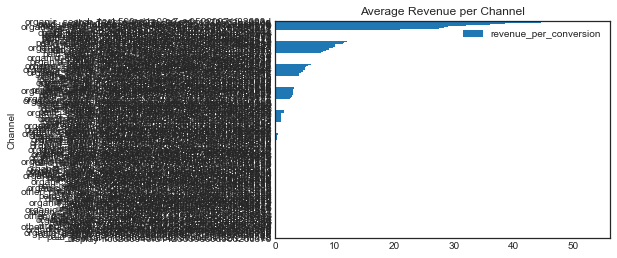

In [ ]:
# visualization
plt.figure(figsize=(1000,50))
channel_attribute_value[['channel_source', 'revenue_per_conversion']].sort_values(
  by = ['revenue_per_conversion'],
  ascending = True 
).plot(
    x = 'channel_source', 
    y = 'revenue_per_conversion', 
    kind = 'barh',
    title = 'Average Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Revenue per Conversion'
)
plt.show()

it's such a mess visualization. Of course it is not our false since the landing page data is in the link form. Because of that, let's jump right in to the Model

# Channel Attribution Model

## Heuristic Model

In [ ]:
data.columns

Index(['mql_id', 'seller_id', 'seller_city', 'seller_state',
       'business_segment', 'lead_type', 'business_type', 'first_contact_date',
       'landing_page_id', 'declared_monthly_revenue', 'origin', 'total_trx',
       'total_ordered', 'price', 'freight_value'],
      dtype='object')

In [ ]:
# data preprocessing
data['total_trx'].fillna(0, inplace=True)
data['freight_value'].fillna(0, inplace=True)
data['has_transaction'] = data.total_trx.apply(lambda x: True if x > 0 else False)

In [ ]:
# define data for model
data_for_model = data[['seller_id', 'origin', 'first_contact_date', 'total_trx', 'freight_value', 'has_transaction']]

In [ ]:
data_for_model

,seller_id,origin,first_contact_date,total_trx,freight_value,has_transaction
0,2c43fb513632d29b3b58df74816f1b06,organic_search,2018-02-21,3.0,72.17,True
1,bbb7d7893a450660432ea6652310ebb7,referral,2018-04-04,0.0,0.00,False
2,612170e34b97004b3ba37eae81836b4c,organic_search,2018-04-03,107.0,2307.06,True
3,21e1781e36faf92725dde4730a88ca0f,paid_search,2018-01-14,0.0,0.00,False
4,ed8cb7b190ceb6067227478e48cf8dde,unknown,2017-10-09,15.0,242.71,True
...,...,...,...,...,...,...
837,bfcc27719640628da877db48b672b169,organic_search,2018-03-28,0.0,0.00,False
838,4a82eab98441aeb64566e2776c1fb2b6,organic_search,2018-05-18,0.0,0.00,False
839,55031883943971ca22db6894574cfe2c,paid_search,2018-05-25,0.0,0.00,False
840,c0e933c238e41f0cd459d6025ee9b364,social,2018-02-04,0.0,0.00,False


In [ ]:
# data for model
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 841
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   seller_id           842 non-null    object        
 1   origin              828 non-null    object        
 2   first_contact_date  842 non-null    datetime64[ns]
 3   total_trx           842 non-null    float64       
 4   freight_value       842 non-null    float64       
 5   has_transaction     842 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 40.3+ KB


In [ ]:
# check null
data_for_model.isnull().sum()

seller_id              0
origin                14
first_contact_date     0
total_trx              0
freight_value          0
has_transaction        0
dtype: int64

In [ ]:
# drop the null
data_for_model = data_for_model.dropna()

In [ ]:
attribution = MAM(
    data_for_model, 
    channels_colname='origin',
    group_channels=True, 
    group_channels_by_id_list=['seller_id'], 
    group_timestamp_colname='first_contact_date',
    journey_with_conv_colname='has_transaction',
    create_journey_id_based_on_conversion = True,
    conversion_value='freight_value'
)

### Last Click Attribution

In [ ]:
attribution.attribution_last_click()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
 channels
 direct_traffic        5645.90
 display                284.95
 email                  637.42
 organic_search       28933.13
 other                 1877.98
 other_publicities        0.00
 paid_search          26723.01
 referral              1800.69
 social                7885.48
 unknown              25020.70
 Name: value, dtype: float64)

### First Click Attribution

In [ ]:
attribution.attribution_first_click()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
             channels  attribution_first_click_heuristic
 0     direct_traffic                            5645.90
 1            display                             284.95
 2              email                             637.42
 3     organic_search                           28933.13
 4              other                            1877.98
 5  other_publicities                               0.00
 6        paid_search                           26723.01
 7           referral                            1800.69
 8             social                            7885.48
 9            unknown                           25020.70)

### Linear Attribution

In [ ]:
attribution.attribution_linear()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
             channels  attribution_linear_heuristic
 0     direct_traffic                       5645.90
 1            display                        284.95
 2              email                        637.42
 3     organic_search                      28933.13
 4              other                       1877.98
 5  other_publicities                          0.00
 6        paid_search                      26723.01
 7           referral                       1800.69
 8             social                       7885.48
 9            unknown                      25020.70)

### Attribution Plot

<AxesSubplot:xlabel='channels', ylabel='value'>

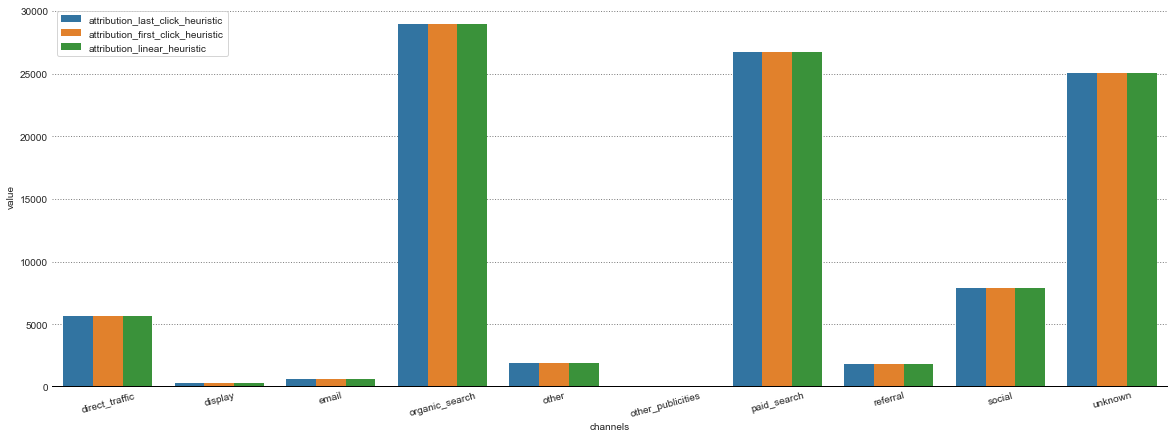

In [ ]:
attribution.plot(model_type='heuristic')

**Interpretation:**

Based on the plot of attribution, `Organic Search` has the largest impact on the marketing channel, following by `Paid Search` and `Unknown Channel`. Since we didn't the unknown channel, we assume it as `Seller Self Marketing`.

It is mean, seller has their own way to sales the product.

##  Markov Model

In [ ]:
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

In [ ]:
# check markov results
markov_results[1]

,channels,attribution_markov_algorithmic
0,other_publicities,0.00
1,referral,1800.69
2,paid_search,26723.01
3,other,1877.98
4,social,7885.48
5,display,284.95
6,unknown,25020.70
7,organic_search,28933.13
8,email,637.42
9,direct_traffic,5645.90


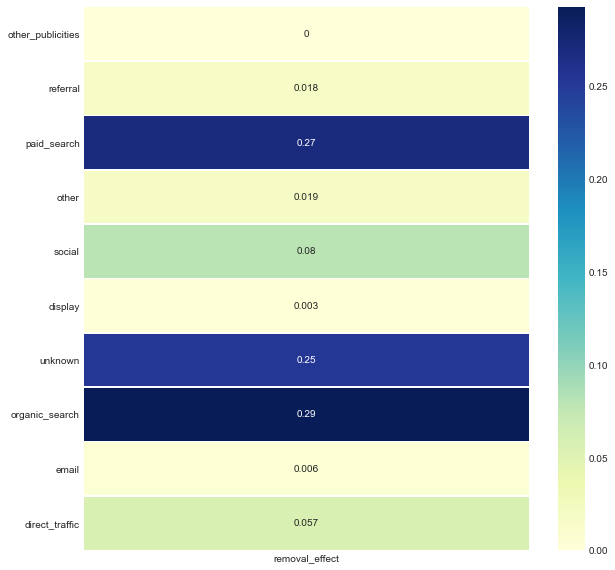

In [ ]:
# check removal effects
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

**Interpretation:**

This visualization goes the same way as the plot of attribution. The largest effect of losses is when we delete the `Organic Search` and `Paid Search` marketing channel. But if we delete the `Other Publicities` channel, we may couldn't find the percentage of losses but we need to identified those publicity. It is maybe the SEO.

## Final Attribution

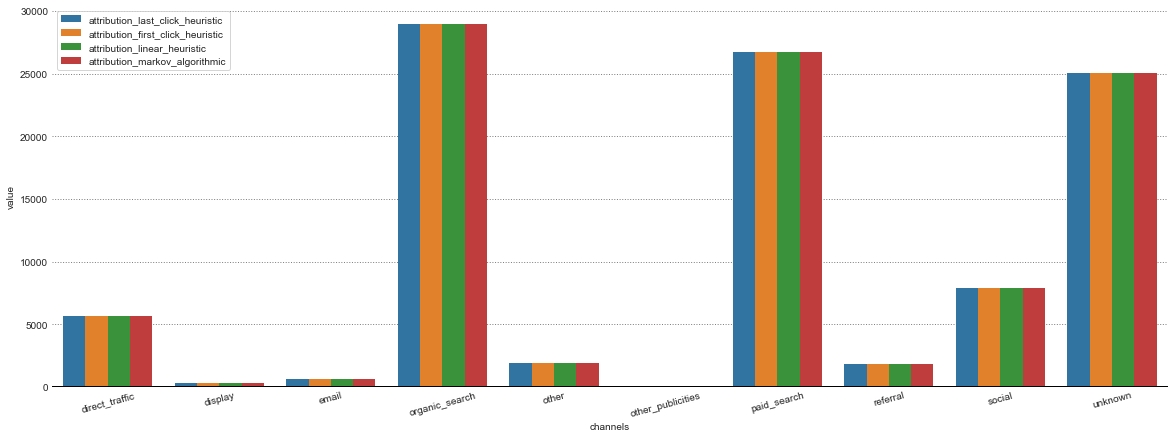

In [ ]:
attribution.plot();

**Interpretation:**

It is the same results from the first Attribution Plot. We didn't get different between these two.

# Converted Seller Analysis

In [ ]:
olist_closed_deals

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [ ]:
olist_marketing_qualified_leads

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [ ]:
# create new columns named as deals
data_for_seller = olist_marketing_qualified_leads
data_for_seller['deals'] = olist_marketing_qualified_leads['mql_id'].isin(olist_closed_deals['mql_id'])

In [ ]:
data_for_seller

,mql_id,first_contact_date,landing_page_id,origin,deals
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,False
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,False
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,False
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,False
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,True
...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,False
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,False
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,False
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,False


In [ ]:
# change deals type as int
data_for_seller['deals'] = data_for_seller['deals'].astype(int)

In [ ]:
data_for_seller

,mql_id,first_contact_date,landing_page_id,origin,deals
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1
...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,0
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,0
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,0
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,0


## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

# split train and test
X = data_for_seller.drop(['deals','landing_page_id'], axis = 1)
y = data_for_seller['deals']
ids = X['mql_id']
X.drop(['mql_id'], axis=1, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# check shape and info
print(X_train.shape)
print(X_train.info())

(6000, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6529 to 4959
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_contact_date  6000 non-null   object
 1   origin              5961 non-null   object
dtypes: object(2)
memory usage: 140.6+ KB
None


In [ ]:
# check shape and info on test data
print(X_test.shape)
print(X_test.info())

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7289 to 5271
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_contact_date  2000 non-null   object
 1   origin              1979 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB
None


In [ ]:
# missing value handling

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [ ]:
# check the imputed
print(imputed_X_train.info())
print(imputed_X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_contact_date  6000 non-null   object
 1   origin              6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_contact_date  2000 non-null   object
 1   origin              2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_X_labeled = imputed_X_train.copy()
test_X_labeled = imputed_X_test.copy()

for col in ['first_contact_date','origin']:
    train_X_labeled[col] = label_encoder.fit_transform(imputed_X_train[col])
    test_X_labeled[col] = label_encoder.fit_transform(imputed_X_test[col]) 

In [ ]:
test_X_labeled

,first_contact_date,origin
0,199,8
1,251,9
2,238,6
3,142,9
4,230,6
...,...,...
1995,88,5
1996,132,3
1997,278,9
1998,262,8


## Modeling

In [ ]:
import sklearn as sklearn

# import metrics method for model evaluation
import sklearn.metrics as metrics

# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

# import decision tree
from sklearn.tree import DecisionTreeClassifier

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, datasets


In [ ]:
# Initialze the estimators
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

In [ ]:
# run machine
lg = clf1.fit(train_X_labeled, y_train)
knc = clf2.fit(train_X_labeled, y_train)
dtc = clf3.fit(train_X_labeled, y_train)
rf = clf4.fit(train_X_labeled, y_train)

### Logistic Regression

In [ ]:
# predict
y_pred_lg = lg.predict(test_X_labeled)
y_pred_proba_lg = lg.predict_proba(test_X_labeled)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_lg, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.896500            0.0    0.8965     0.448250      0.803712
recall        1.000000            0.0    0.8965     0.500000      0.896500
f1-score      0.945426            0.0    0.8965     0.472713      0.847574
support    1793.000000          207.0    0.8965  2000.000000   2000.000000 



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cross validation
scores = cross_val_score(lg, train_X_labeled, y_train, cv=5)
print(np.sqrt(scores))

[0.94560386 0.94560386 0.94560386 0.94560386 0.94560386]


In [ ]:
# r2 score

from sklearn.metrics import r2_score

lin = r2_score(y_test, lg.predict(test_X_labeled))*100
print(lin,'%')

-11.54489682097044 %


Confusion Matrix on Logistic Regression Tuning:
 AxesSubplot(0.125,0.125;0.62x0.755)


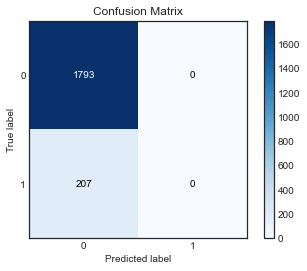

In [ ]:
# confusion metric
import scikitplot as skplt

lg_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_lg)
print('Confusion Matrix on Logistic Regression Tuning:\n',lg_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


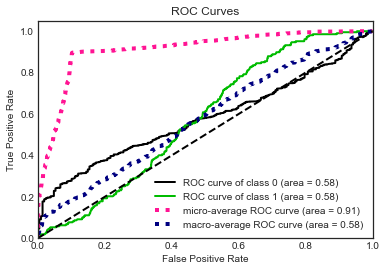

In [ ]:
# model performance check
lg_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_lg)
print(lg_ROC_AUC)

In [ ]:
# predict
y_pred = lg.predict(test_X_labeled)
y_pred_proba = lg.predict_proba(test_X_labeled)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

In [ ]:
# check model accuracy
lg_accuracy = metrics.accuracy_score(y_test, y_pred_lg)
print("The accuracy score for Random Forest is:",lg_accuracy,'\n')

# check f1-score
lg_f1_score = metrics.f1_score(y_test,y_pred_lg)
print("The F1 score on Random Forest is:",lg_f1_score,'\n')

The accuracy score for Random Forest is: 0.8965 

The F1 score on Random Forest is: 0.0 



### K-Neighbors

In [ ]:
# predict
y_pred_knc = knc.predict(test_X_labeled)
y_pred_proba_knc = knc.predict_proba(test_X_labeled)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_knc, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.896657       0.115385    0.8865     0.506021      0.815795
recall        0.987172       0.014493    0.8865     0.500833      0.886500
f1-score      0.939740       0.025751    0.8865     0.482745      0.845142
support    1793.000000     207.000000    0.8865  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(knc, train_X_labeled, y_train, cv=5)
print(np.sqrt(scores))

[0.9336309  0.93452305 0.93941471 0.94030137 0.93719439]


In [ ]:
# r2 score

kn = r2_score(y_test, knc.predict(test_X_labeled))*100
print(kn,'%')

-22.32218153797241 %


Confusion Matrix on Logistic Regression Tuning:
 AxesSubplot(0.125,0.125;0.62x0.755)


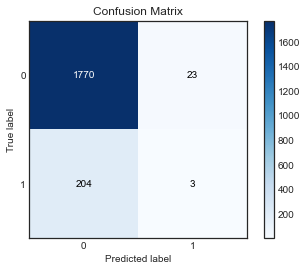

In [ ]:
# confusion metric

kn_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_knc)
print('Confusion Matrix on Logistic Regression Tuning:\n',kn_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


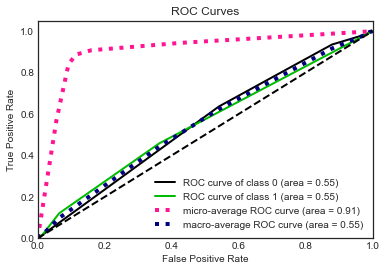

In [ ]:
# model performance check
kn_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_knc)
print(kn_ROC_AUC)

In [ ]:
# check model accuracy
kn_accuracy = metrics.accuracy_score(y_test, y_pred_knc)
print("The accuracy score for Random Forest is:",kn_accuracy,'\n')

# check f1-score
kn_f1_score = metrics.f1_score(y_test,y_pred_knc)
print("The F1 score on Random Forest is:",kn_f1_score,'\n')

The accuracy score for Random Forest is: 0.8865 

The F1 score on Random Forest is: 0.02575107296137339 



### Decision Tree

In [ ]:
# predict
y_pred_dtc = dtc.predict(test_X_labeled)
y_pred_proba_dtc = dtc.predict_proba(test_X_labeled)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_dtc, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.901538       0.300000    0.8865     0.600769      0.839279
recall        0.980480       0.072464    0.8865     0.526472      0.886500
f1-score      0.939353       0.116732    0.8865     0.528042      0.854212
support    1793.000000     207.000000    0.8865  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(dtc, train_X_labeled, y_train, cv=5)
print(np.sqrt(scores))

[0.93808315 0.93630479 0.9336309  0.93719439 0.93407708]


In [ ]:
# r2 score

dt = r2_score(y_test, dtc.predict(test_X_labeled))*100
print(dt,'%')

-22.32218153797241 %


Confusion Matrix on Logistic Regression Tuning:
 AxesSubplot(0.125,0.125;0.62x0.755)


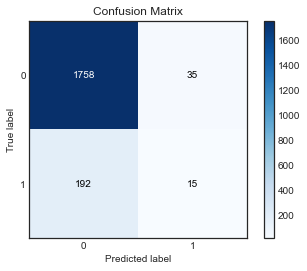

In [ ]:
# confusion metric

dt_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_dtc)
print('Confusion Matrix on Logistic Regression Tuning:\n',dt_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


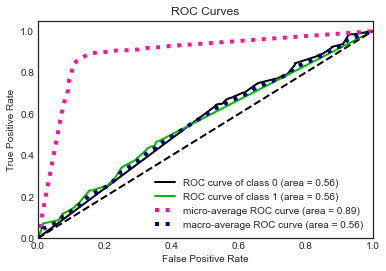

In [ ]:
# model performance check
dt_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_dtc)
print(dt_ROC_AUC)

In [ ]:
# check model accuracy
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dtc)
print("The accuracy score for Random Forest is:",dt_accuracy,'\n')

# check f1-score
dt_f1_score = metrics.f1_score(y_test,y_pred_dtc)
print("The F1 score on Random Forest is:",dt_f1_score,'\n')

The accuracy score for Random Forest is: 0.8865 

The F1 score on Random Forest is: 0.11673151750972763 



### Random Forest

In [ ]:
# predict
y_pred_rf = rf.predict(test_X_labeled)
y_pred_proba_rf = rf.predict_proba(test_X_labeled)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.900878       0.238095      0.88     0.569486      0.832280
recall        0.973229       0.072464      0.88     0.522846      0.880000
f1-score      0.935657       0.111111      0.88     0.523384      0.850316
support    1793.000000     207.000000      0.88  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(rf, train_X_labeled, y_train, cv=5)
print(np.sqrt(scores))

[0.93763888 0.93005376 0.93229108 0.93585968 0.93184405]


In [ ]:
# r2 score

rfc = r2_score(y_test, rf.predict(test_X_labeled))*100
print(rfc,'%')

-29.327416604023693 %


Confusion Matrix on Logistic Regression Tuning:
 AxesSubplot(0.125,0.125;0.62x0.755)


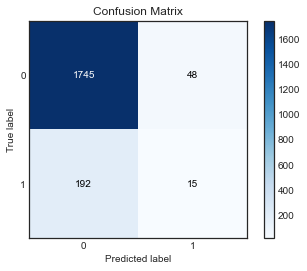

In [ ]:
# confusion metric

rfc_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix on Logistic Regression Tuning:\n',rfc_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


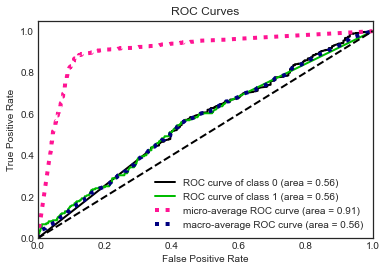

In [ ]:
# model performance check
rfc_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_rf)
print(rfc_ROC_AUC)

In [ ]:
# check model accuracy
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("The accuracy score for Random Forest is:",rf_accuracy,'\n')

# check f1-score
rf_f1_score = metrics.f1_score(y_test,y_pred_rf)
print("The F1 score on Random Forest is:",rf_f1_score,'\n')

The accuracy score for Random Forest is: 0.88 

The F1 score on Random Forest is: 0.11111111111111112 



## Modeling Comparison

Text(0.5, 1.0, 'Plotting the Model Accuracies Score')

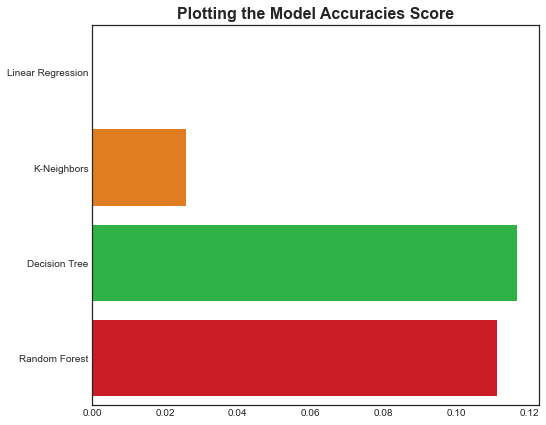

In [ ]:
plt.figure(figsize= (8,7))
ac = [lg_f1_score, kn_f1_score, dt_f1_score, rf_f1_score]
name = ['Linear Regression','K-Neighbors','Decision Tree','Random Forest']
sns.barplot(x = ac,y = name,palette='bright')
plt.title("Plotting the Model Accuracies Score", fontsize=16, fontweight="bold")

The best modeling is Decision Tree by F1 Score, even the Confusion Matrix didn't goes well.